In [12]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop

In [13]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

In [14]:
from tensorflow.keras import backend as K

if K.image_data_format() == 'channels_first':
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 1, 28, 28)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 28, 28, 1)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)
    
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

In [15]:
train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


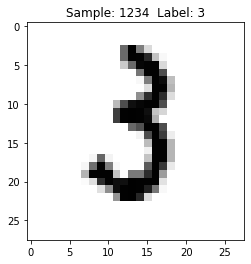

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
def display_sample(num):
    #Print the one-hot array of this sample's label 
    print(train_labels[num])  
    #Print the label converted back to a number
    label = train_labels[num].argmax(axis=0)
    #Reshape the 768 values to a 28x28 image
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1234)

In [17]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 32)        9248      
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 10, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               409728    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=10, verbose=2, validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 74s - loss: 0.1975 - acc: 0.9398 - val_loss: 0.0484 - val_acc: 0.9851
Epoch 2/10
 - 74s - loss: 0.0778 - acc: 0.9769 - val_loss: 0.0328 - val_acc: 0.9888
Epoch 3/10
 - 74s - loss: 0.0589 - acc: 0.9826 - val_loss: 0.0283 - val_acc: 0.9912
Epoch 4/10
 - 73s - loss: 0.0492 - acc: 0.9856 - val_loss: 0.0283 - val_acc: 0.9908
Epoch 5/10
 - 72s - loss: 0.0423 - acc: 0.9874 - val_loss: 0.0237 - val_acc: 0.9925
Epoch 6/10
 - 73s - loss: 0.0379 - acc: 0.9880 - val_loss: 0.0248 - val_acc: 0.9918
Epoch 7/10
 - 75s - loss: 0.0324 - acc: 0.9901 - val_loss: 0.0242 - val_acc: 0.9931
Epoch 8/10
 - 75s - loss: 0.0302 - acc: 0.9904 - val_loss: 0.0305 - val_acc: 0.9921
Epoch 9/10
 - 75s - loss: 0.0268 - acc: 0.9908 - val_loss: 0.0291 - val_acc: 0.9923
Epoch 10/10
 - 74s - loss: 0.0276 - acc: 0.9913 - val_loss: 0.0256 - val_acc: 0.9926


In [21]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02558160397118545
Test accuracy: 0.9926


In [22]:
# Save the model to later test
model.save("MNIST-HandWriting-CNN.model")